<a href="https://colab.research.google.com/github/Joezy123456/web/blob/main/autoencoder_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from google.colab import files

In [53]:
# Upload file
uploaded = files.upload()

Saving Iris.csv to Iris (4).csv


In [54]:
# Load the Iris dataset
iris = pd.read_csv(next(iter(uploaded.keys())))

In [55]:
# Separate features and target labels
features = iris.drop(columns=['Species'])
target = iris['Species']

In [57]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [58]:
# Define the autoencoder model
input_dim = features_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
encoder_model = Model(inputs=input_layer, outputs=encoder)

autoencoder.compile(optimizer='sgd', loss='bce')

In [59]:
# Train the autoencoder
X_train, X_test = train_test_split(features_scaled, test_size=0.2, random_state=42)
autoencoder.fit(X_train, X_train, epochs=40, batch_size=14, validation_data=(X_test, X_test), verbose=1)

Epoch 1/40
9/9 [==============================] - 1s 38ms/step - loss: 0.6375 - val_loss: 0.6989
Epoch 2/40
9/9 [==============================] - 0s 9ms/step - loss: 0.6242 - val_loss: 0.6850
Epoch 3/40
9/9 [==============================] - 0s 8ms/step - loss: 0.6099 - val_loss: 0.6685
Epoch 4/40
9/9 [==============================] - 0s 10ms/step - loss: 0.5944 - val_loss: 0.6481
Epoch 5/40
9/9 [==============================] - 0s 9ms/step - loss: 0.5766 - val_loss: 0.6280
Epoch 6/40
9/9 [==============================] - 0s 11ms/step - loss: 0.5572 - val_loss: 0.6047
Epoch 7/40
9/9 [==============================] - 0s 12ms/step - loss: 0.5352 - val_loss: 0.5788
Epoch 8/40
9/9 [==============================] - 0s 9ms/step - loss: 0.5138 - val_loss: 0.5526
Epoch 9/40
9/9 [==============================] - 0s 7ms/step - loss: 0.4905 - val_loss: 0.5245
Epoch 10/40
9/9 [==============================] - 0s 6ms/step - loss: 0.4647 - val_loss: 0.4958
Epoch 11/40
9/9 [==================

In [60]:
# Encode the scaled features
X_encoded = encoder_model.predict(features_scaled)

5/5 [==============================] - 0s 3ms/step


In [61]:
# Perform K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


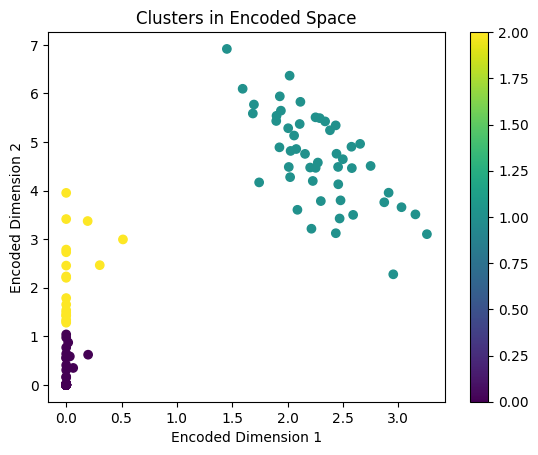

In [62]:
# Visualize the clusters
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.title('Clusters in Encoded Space')
plt.colorbar()
plt.show()

In [63]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X_encoded, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.7552318572998047
